In [12]:
import pandas as pd
import h5py
import numpy as np
from sklearn.feature_selection import r_regression
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


from tools import add_interactions  # custom tools defined in this directory
from math import isclose

In [13]:
names = ['P', 'AP', 'A²P', 'A³P', 'row-sum A²', 'row-sum A³', 'node degree',
       'degree centrality', 'minimum neighbor degree', 'maximum neighbor degree',
       'clustering coefficient', 'betweenness centrality', 'closeness centrality',
       'load centrality', 'eigenvector centrality', 'Katz centrality',
       'second-order centrality', 'current-flow closeness centrality',
       'current-flow betweenness centrality', 'mean neighbor degree',
       'harmonic centrality', 'square clustering', 'eccentricity', 'tree node classification',
       'bulk', 'root', 'dense sprout', 'sparse sprout', 'inner tree node',
       'proper leaf', 'fiedler vector', 'node connected to max loaded line',
       'max load connected lines', 'min load connected lines',
       'mean load connected lines', 'resistance-distance centrality',
       'degree assortativity coefficient', 'transitivity', 'diameter',
       'P-assortativity coefficient', 'Kirchhoff index',
       'resistance-distance Kirchhoff index', 'inverse algebraic connectivity',
       'eigenratio', 'power sign ratio', 'max line load',
       'universal Kuramoto order parameter', 'graph connected w/o max loaded line']

global_names = [
        'degree assortativity coefficient',
        'P-assortativity coefficient',
        'transitivity', 
        'diameter',
        'Kirchhoff index',
        'resistance-distance Kirchhoff index', 
        'inverse algebraic connectivity',
        'eigenratio',
        'power sign ratio', 
        'max line load',
        'universal Kuramoto order parameter',
        'graph connected w/o max loaded line'
    ]

In [19]:
datapath = "/p/projects/coen/christian/datasets/snbs_homogeneous_dataset/single_files_netsci/"
datasets = {}
mi_datasets = {}
pearson_vals = {}
mi_vals = {}

for country in ["texas", "elmod", "osf_france",  "osf_gb",  "osf_spain"]:
    
    hf = h5py.File(datapath + country + "/snbs.h5", 'r')
    y = np.array(hf.get(list(hf.keys())[0])).flatten()
    hf.close()
            

    _X = pd.read_csv(
        datapath + country + "/input_features.csv"
    ).drop(
        columns=[
            "backup_capacity", 
            "maximal_line_load_post_dc"
        ]
    )

    
    if country not in ["texas"]:
        _X = _X.drop(columns=["neighbor_degree_mean"])
    
    
    # Pearson
    X = _X.copy()
    
    X.columns = names
    X = X.drop(columns=['tree node classification'])
    X = X.drop(columns=global_names)
    
    datasets[country] = (X,y)
    pearson_vals[country] = r_regression(X,y)
    
    # Mutual info
    X = _X.copy()
    X.columns = names
    X['tree node classification'] = pd.factorize(X['tree node classification'])[0]

    mi_datasets[country] = (X,y)
    mi_vals[country] = mutual_info_regression(
        X, y,
        discrete_features=[list(X.columns).index('tree node classification')]
    )


In [18]:
colnames = datasets["texas"][0].columns

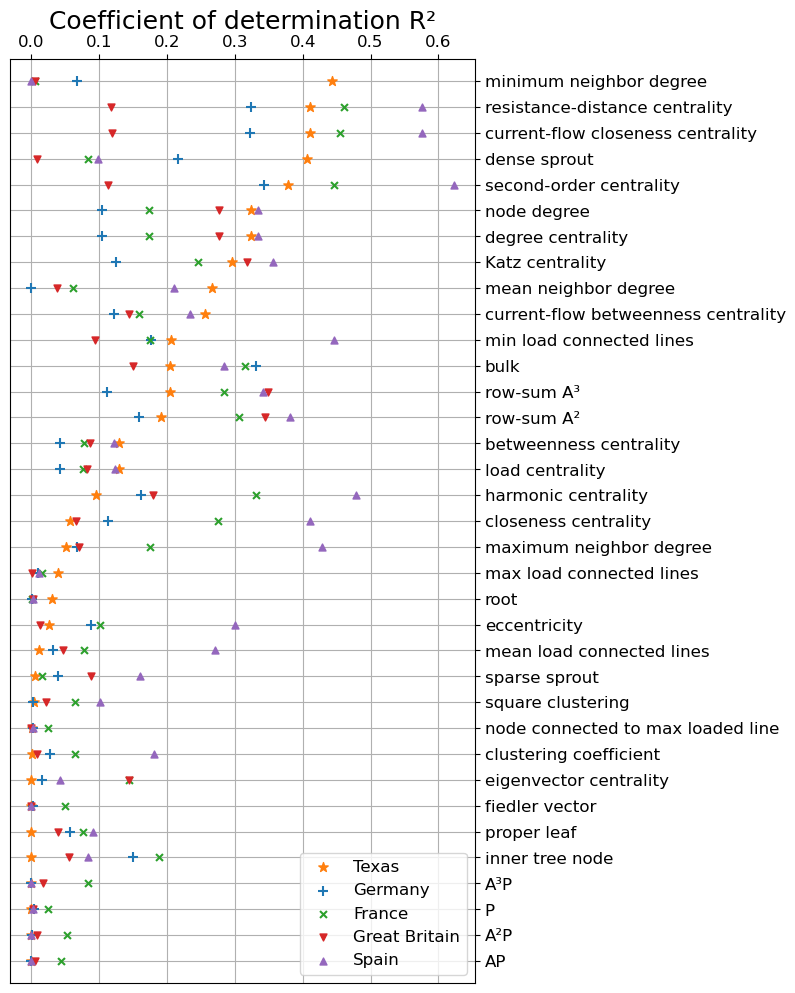

In [8]:
fig = plt.figure(figsize=(6,12))



plt.scatter(
    *reversed(list(zip(*sorted(zip(colnames, pearson_vals["texas"]**2), key=lambda x: x[1])))),
    label="Texas",
    color="tab:orange", 
    marker="*",
    s=50
)

ax = plt.gca()
ax.set_prop_cycle(
    color=[
        'tab:blue',
        'tab:green',
        'tab:red',
        'tab:purple',
    ]
)
markers = itertools.cycle(["+", "x", "v", "^"])
sizes = itertools.cycle([50,25,25,25])
labels = itertools.cycle(["Germany", "France", "Great Britain", "Spain"])


for country in pearson_vals.keys():
    if country == "texas":
        continue
    plt.scatter(
        *reversed(list(zip(*sorted(zip(colnames, pearson_vals[country]**2), key=lambda x: x[1])))),
        label=next(labels),
        marker=next(markers),
        s=next(sizes)
    )




ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top') 
ax.set_axisbelow(True)
ax.yaxis.tick_right()
#ax.set_yticklabels([])


# secax = ax.secondary_xaxis('bottom',functions=(lambda x: x**2, lambda x: x**(1/2)))


plt.margins(0.05, 0.025)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Coefficient of determination R²", fontsize=18)
plt.grid()
plt.legend(fontsize=12)


plt.savefig("real_grids_univariate_r2.png", dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()

# Correlation

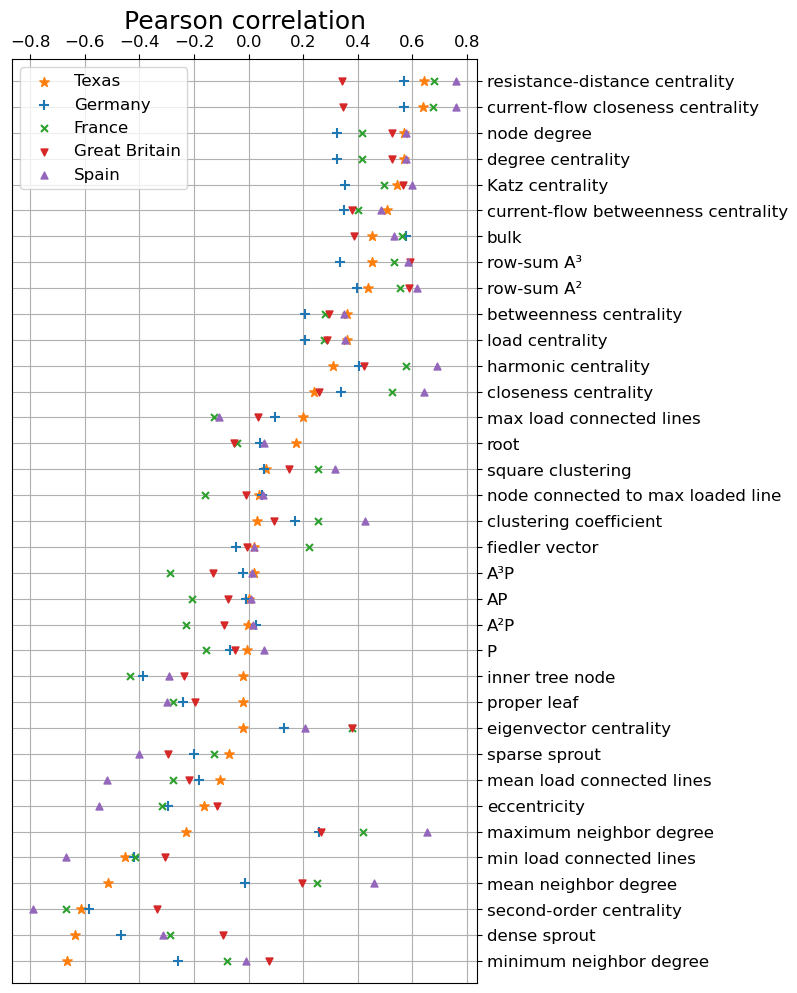

In [9]:
fig = plt.figure(figsize=(6,12))



plt.scatter(
    *reversed(list(zip(*sorted(zip(colnames, pearson_vals["texas"]), key=lambda x: x[1])))),
    label="Texas",
    color="tab:orange", 
    marker="*",
    s=50
)

ax = plt.gca()
ax.set_prop_cycle(
    color=[
        'tab:blue',
        'tab:green',
        'tab:red',
        'tab:purple',
    ]
)
markers = itertools.cycle(["+", "x", "v", "^"])
sizes = itertools.cycle([50,25,25,25])
labels = itertools.cycle(["Germany", "France", "Great Britain", "Spain"])


for country in pearson_vals.keys():
    if country == "texas":
        continue
    plt.scatter(
        *reversed(list(zip(*sorted(zip(colnames, pearson_vals[country]), key=lambda x: x[1])))),
        label=next(labels),
        marker=next(markers),
        s=next(sizes)
    )




ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top') 
ax.set_axisbelow(True)
ax.yaxis.tick_right()
#ax.set_yticklabels([])


# secax = ax.secondary_xaxis('bottom',functions=(lambda x: x**2, lambda x: x**(1/2)))


plt.margins(0.05, 0.025)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Pearson correlation", fontsize=18)
plt.grid()
plt.legend(fontsize=12)


plt.savefig("real_grids_pearson_named.png", dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()

# Mutual info

In [30]:
colnames = mi_datasets["texas"][0].columns

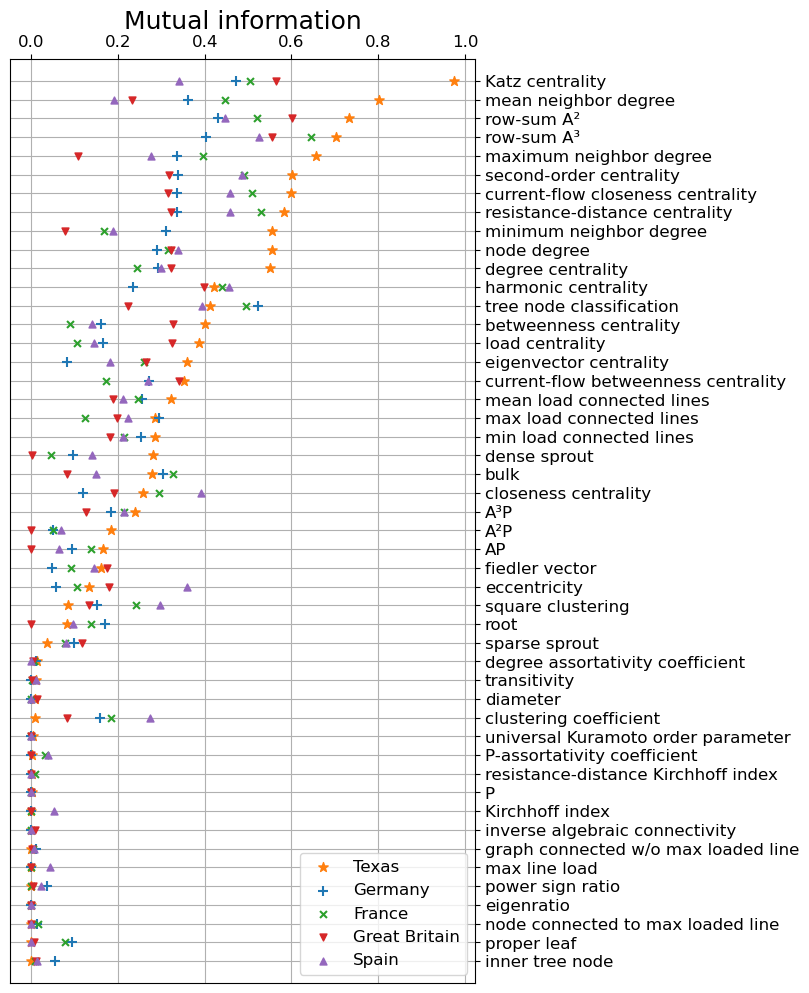

In [37]:
fig = plt.figure(figsize=(6,12))



plt.scatter(
    *reversed(list(zip(*sorted(zip(colnames, mi_vals["texas"]), key=lambda x: x[1])))),
    label="Texas",
    color="tab:orange", 
    marker="*",
    s=50
)

ax = plt.gca()
ax.set_prop_cycle(
    color=[
        'tab:blue',
        'tab:green',
        'tab:red',
        'tab:purple',
    ]
)
markers = itertools.cycle(["+", "x", "v", "^"])
sizes = itertools.cycle([50,25,25,25])
labels = itertools.cycle(["Germany", "France", "Great Britain", "Spain"])


for country in pearson_vals.keys():
    if country == "texas":
        continue
    plt.scatter(
        *reversed(list(zip(*sorted(zip(colnames, mi_vals[country]), key=lambda x: x[1])))),
        label=next(labels),
        marker=next(markers),
        s=next(sizes)
    )




ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top') 
ax.set_axisbelow(True)
ax.yaxis.tick_right()
#ax.set_yticklabels([])


# secax = ax.secondary_xaxis('bottom',functions=(lambda x: x**2, lambda x: x**(1/2)))


plt.margins(0.05, 0.025)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Mutual information", fontsize=18)
plt.grid()
plt.legend(fontsize=12)


plt.savefig("real_grids_mi_named.png", dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()